In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")

In [4]:
df_data_1 = pd.read_csv('part_1_data.csv'))
df_data_1.head()


,in_sf,beds,bath,price,year_built,sqft,price_per_sqft,elevation
0,0,2,1,999000,1960,1000,999,10
1,0,2,2,2750000,2006,1418,1939,0
2,0,2,2,1350000,1900,2150,628,9
3,0,1,1,629000,1903,500,1258,9
4,0,0,1,439000,1930,500,878,10


In [53]:
d = {'location': pd.Series(['San Francisco', 'San Francisco', 'New York', 'San Francisco', 'New York'], index=range(5))}
pd.DataFrame(d)

,location
0,San Francisco
1,San Francisco
2,New York
3,San Francisco
4,New York


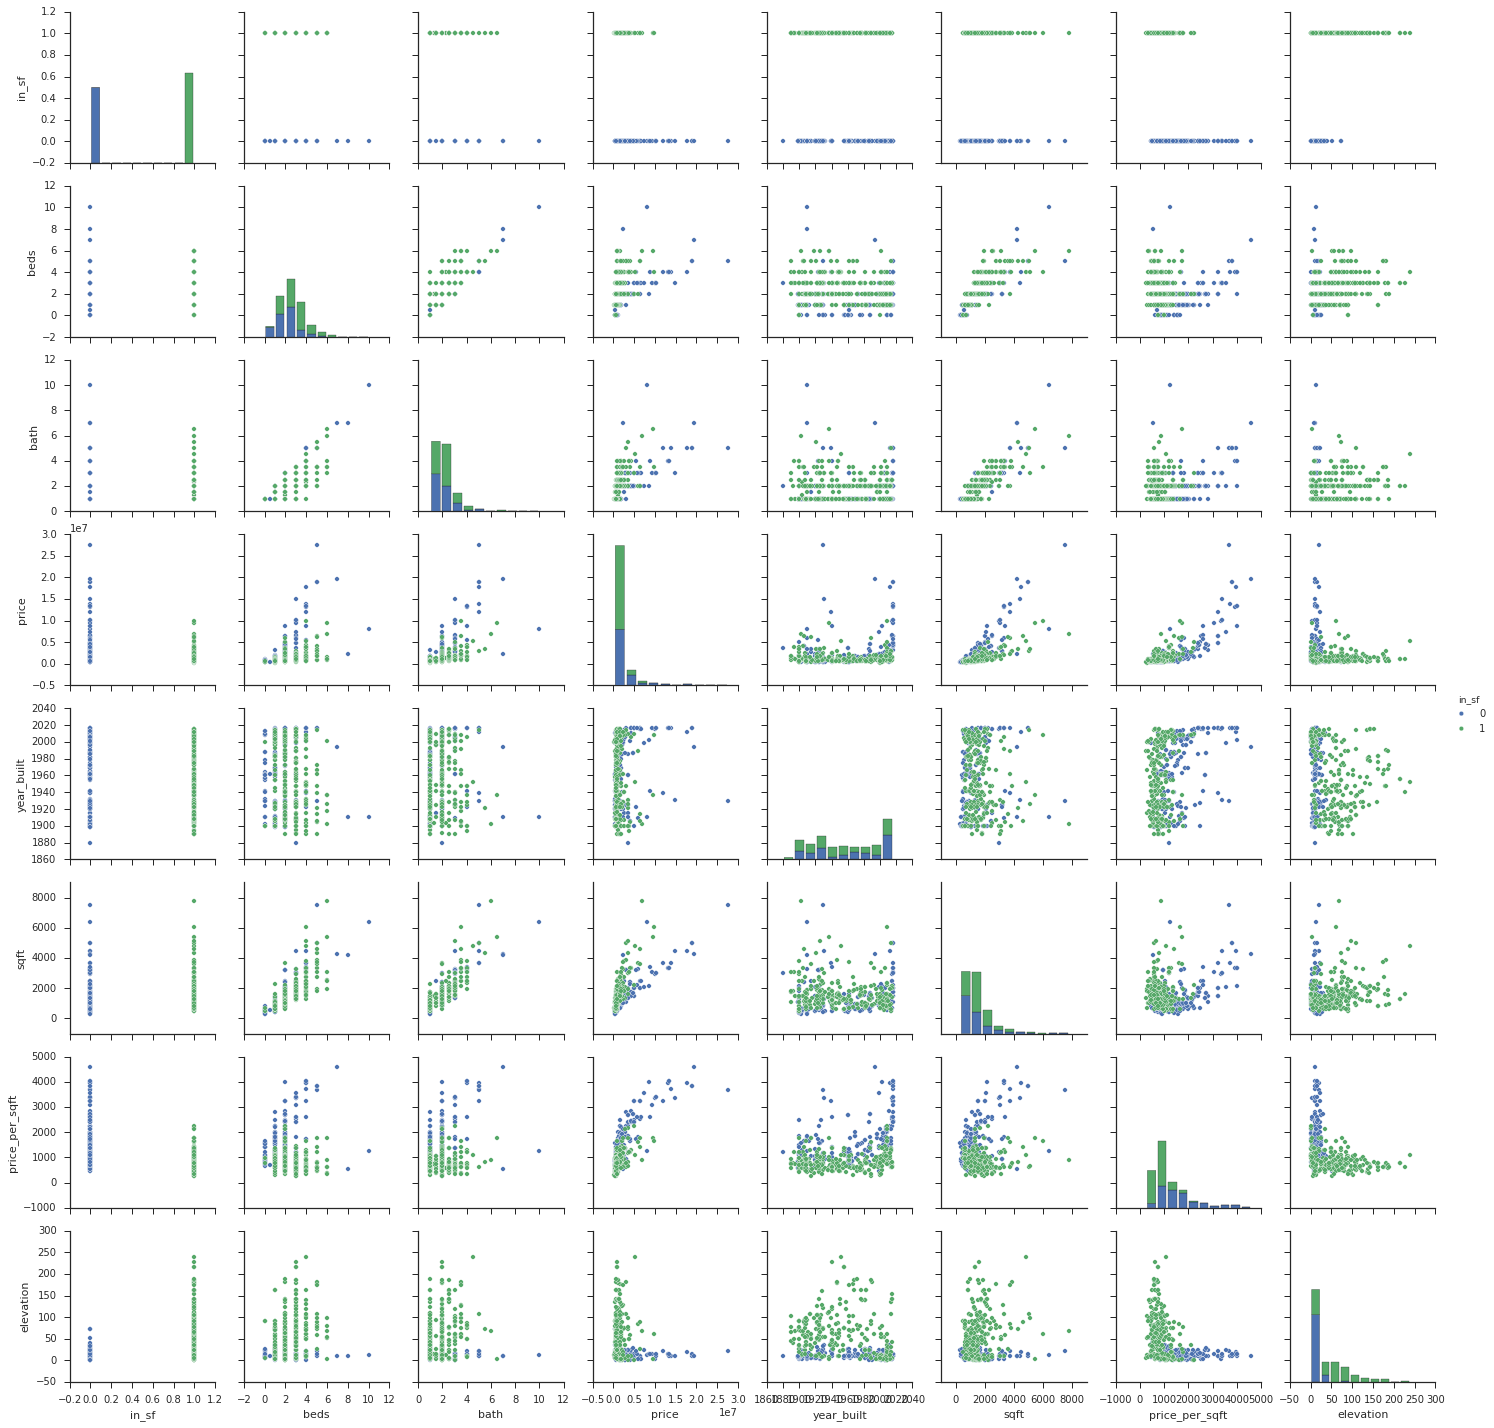

In [7]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df_data_1,hue="in_sf")
sns.plt.show() 

In [17]:
pps_el = df_data_1[['in_sf','price_per_sqft','elevation']]
pps_sqft = df_data_1[['in_sf','price_per_sqft','sqft']]
pps_p = df_data_1[['in_sf','price_per_sqft','price']]
pre_data = [pps_el, pps_sqft, pps_p]

In [9]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s197-a538181e51c0c7-06e23a370ebe/.local/lib/python2.7/site-packages


In [11]:
from sklearn import *


/gpfs/fs01/user/s197-a538181e51c0c7-06e23a370ebe/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/gpfs/fs01/user/s197-a538181e51c0c7-06e23a370ebe/.local/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/gpfs/fs01/user/s197-a538181e51c0c7-06e23a370ebe/.local/lib/python2.7/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the

In [43]:
pre_data = [pps_el, pps_sqft, pps_p]

def split_data(data, pct_train=None, x_cols=[0], y_cols=[1], shuffle_data=False):
    if shuffle_data:
        np.random.shuffle(data)
    
    x = data[:, x_cols]
    y = data[:, y_cols]
    
    train_x, train_y, test_x, test_y = None, None, None, None
    if pct_train != None:
        r, c = data.shape
        train_rows = int(pct_train * r)
        train_x = x[:train_rows, :]
        train_y = y[:train_rows, :]
        test_x = x[train_rows:, :]
        test_y = y[train_rows:, :]
    
    return x, y, train_x, train_y, test_x, test_y

training_pct = 0.7
datasets = []
for d in pre_data:
    d = d / d.max()
    v = d.values
    x, y, train_x, train_y, test_x, test_y = split_data(v, pct_train = None, x_cols = [1,2], y_cols = [0], shuffle_data=False)
    datasets.append([x, y])


/usr/local/src/bluemix_jupyter_bundle.v57/notebook/lib/python2.7/site-packages/ipykernel/__main__.py:62: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/src/bluemix_jupyter_bundle.v57/notebook/lib/python2.7/site-packages/ipykernel/__main__.py:62: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


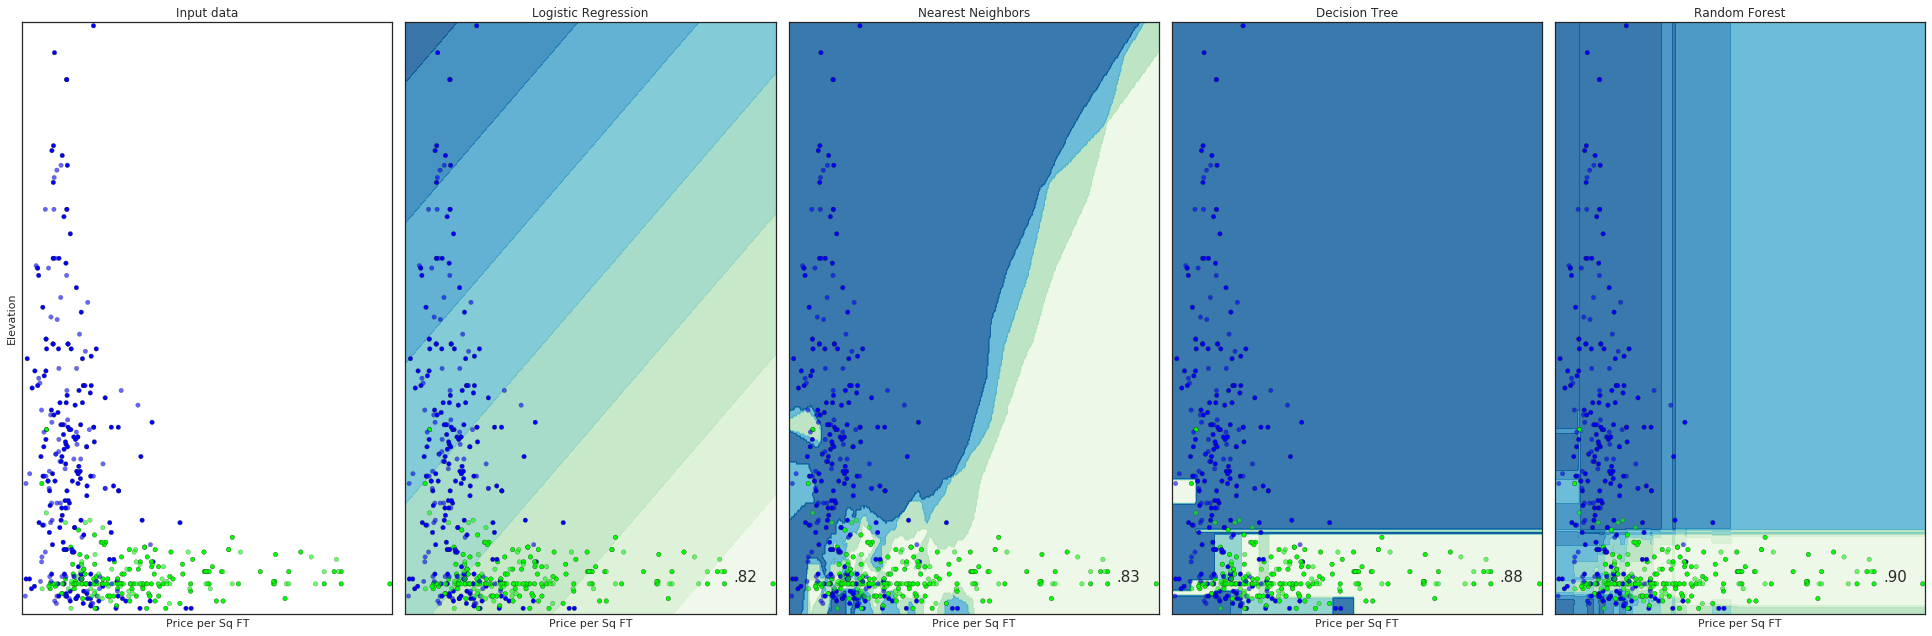

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

h = .02  # step size in the mesh

names = ["Logistic Regression", "Nearest Neighbors", "Decision Tree", "Random Forest"]

classifiers = [
    LogisticRegression(),
    neighbors.KNeighborsClassifier(3),
    tree.DecisionTreeClassifier(max_depth=5),
    ensemble.RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = datasets[0:1]



figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .05, X[:, 0].max() + .05
    y_min, y_max = X[:, 1].min() - .05, X[:, 1].max() + .05
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.GnBu
    cm_bright = ListedColormap(['#00FF00', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_xlabel("Price per Sq FT")
    ax.set_ylabel("Elevation")
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        ax.set_xlabel("Price per Sq FT")
        i += 1
        
plt.tight_layout()
plt.show()

/usr/local/src/bluemix_jupyter_bundle.v57/notebook/lib/python2.7/site-packages/ipykernel/__main__.py:58: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


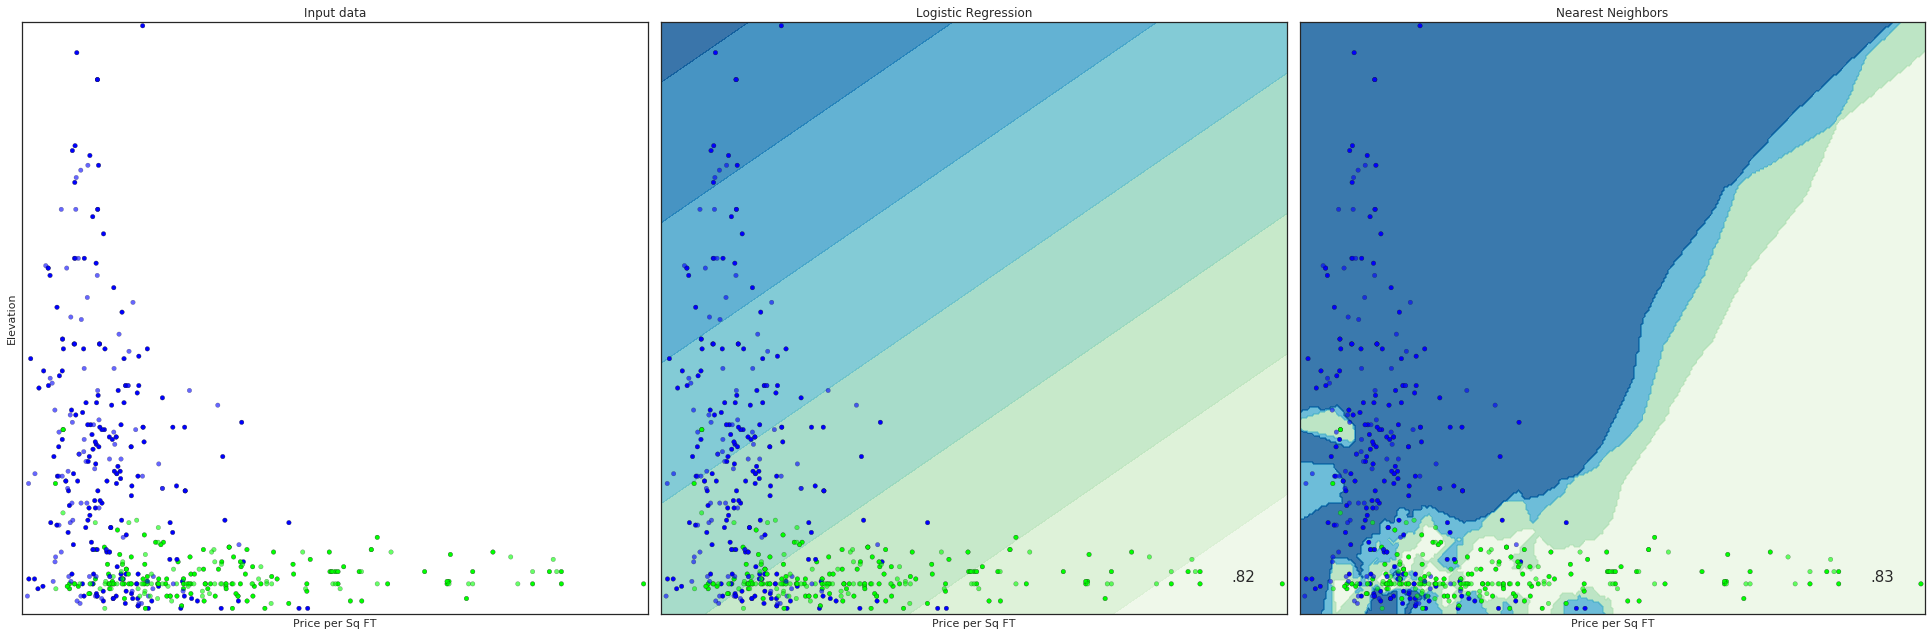

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

h = .02  # step size in the mesh

names = ["Logistic Regression", "Nearest Neighbors"]

classifiers = [
    LogisticRegression(),
    neighbors.KNeighborsClassifier(3)]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = datasets[0:1]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .05, X[:, 0].max() + .05
    y_min, y_max = X[:, 1].min() - .05, X[:, 1].max() + .05
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.GnBu
    cm_bright = ListedColormap(['#00FF00', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_xlabel("Price per Sq FT")
    ax.set_ylabel("Elevation")
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        ax.set_xlabel("Price per Sq FT")
        i += 1
        
plt.tight_layout()
plt.show()